# Contents

1. Temperature forecast
2. Problem Definition
3. Data Analysis (EDA)
4. Pre-processing Pipeline
5. Building Machine Learning Models
6. Concluding Remarks

# 1.Temperature forecast

Data Set Information:
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8

# 2. Problem Definition

Biasness is present in the dataset. We need to clean it and predict the min amd max temp. of next day.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [26]:
pd.set_option('display.max_rows',None)

In [25]:
pd.set_option('display.max_columns',None)

In [2]:
df1=pd.read_csv('Bias_correction.csv')
df1.head(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,6.0,30-06-2013,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,...,0.0,0.0,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,7.0,30-06-2013,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,...,0.0,0.0,0.0,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,8.0,30-06-2013,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,...,0.0,0.0,0.0,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,9.0,30-06-2013,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,...,0.0,0.0,0.0,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,10.0,30-06-2013,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,...,0.0,0.0,0.0,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


In [3]:
df=df1.iloc[:,2:]

In [4]:
df.head(3)

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9


# 3. Data Analysis(EDA)

In [5]:
df.isnull().sum()

Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [6]:
df=df.fillna(df.median())

In [7]:
df.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [8]:
df=df.round(3)

In [9]:
df.head(3)

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.256,91.116,28.074,23.007,6.819,69.452,0.234,0.204,...,0.0,0.0,0.0,37.605,126.991,212.335,2.785,5992.896,29.1,21.2
1,31.9,21.6,52.263,90.605,29.851,24.035,5.692,51.937,0.226,0.252,...,0.0,0.0,0.0,37.605,127.032,44.762,0.514,5869.312,30.5,22.5
2,31.6,23.3,48.690,83.974,30.091,24.566,6.138,20.573,0.209,0.257,...,0.0,0.0,0.0,37.578,127.058,33.307,0.266,5863.556,31.1,23.9


In [10]:
collist=df.columns.values
ncol=2
nrows=14

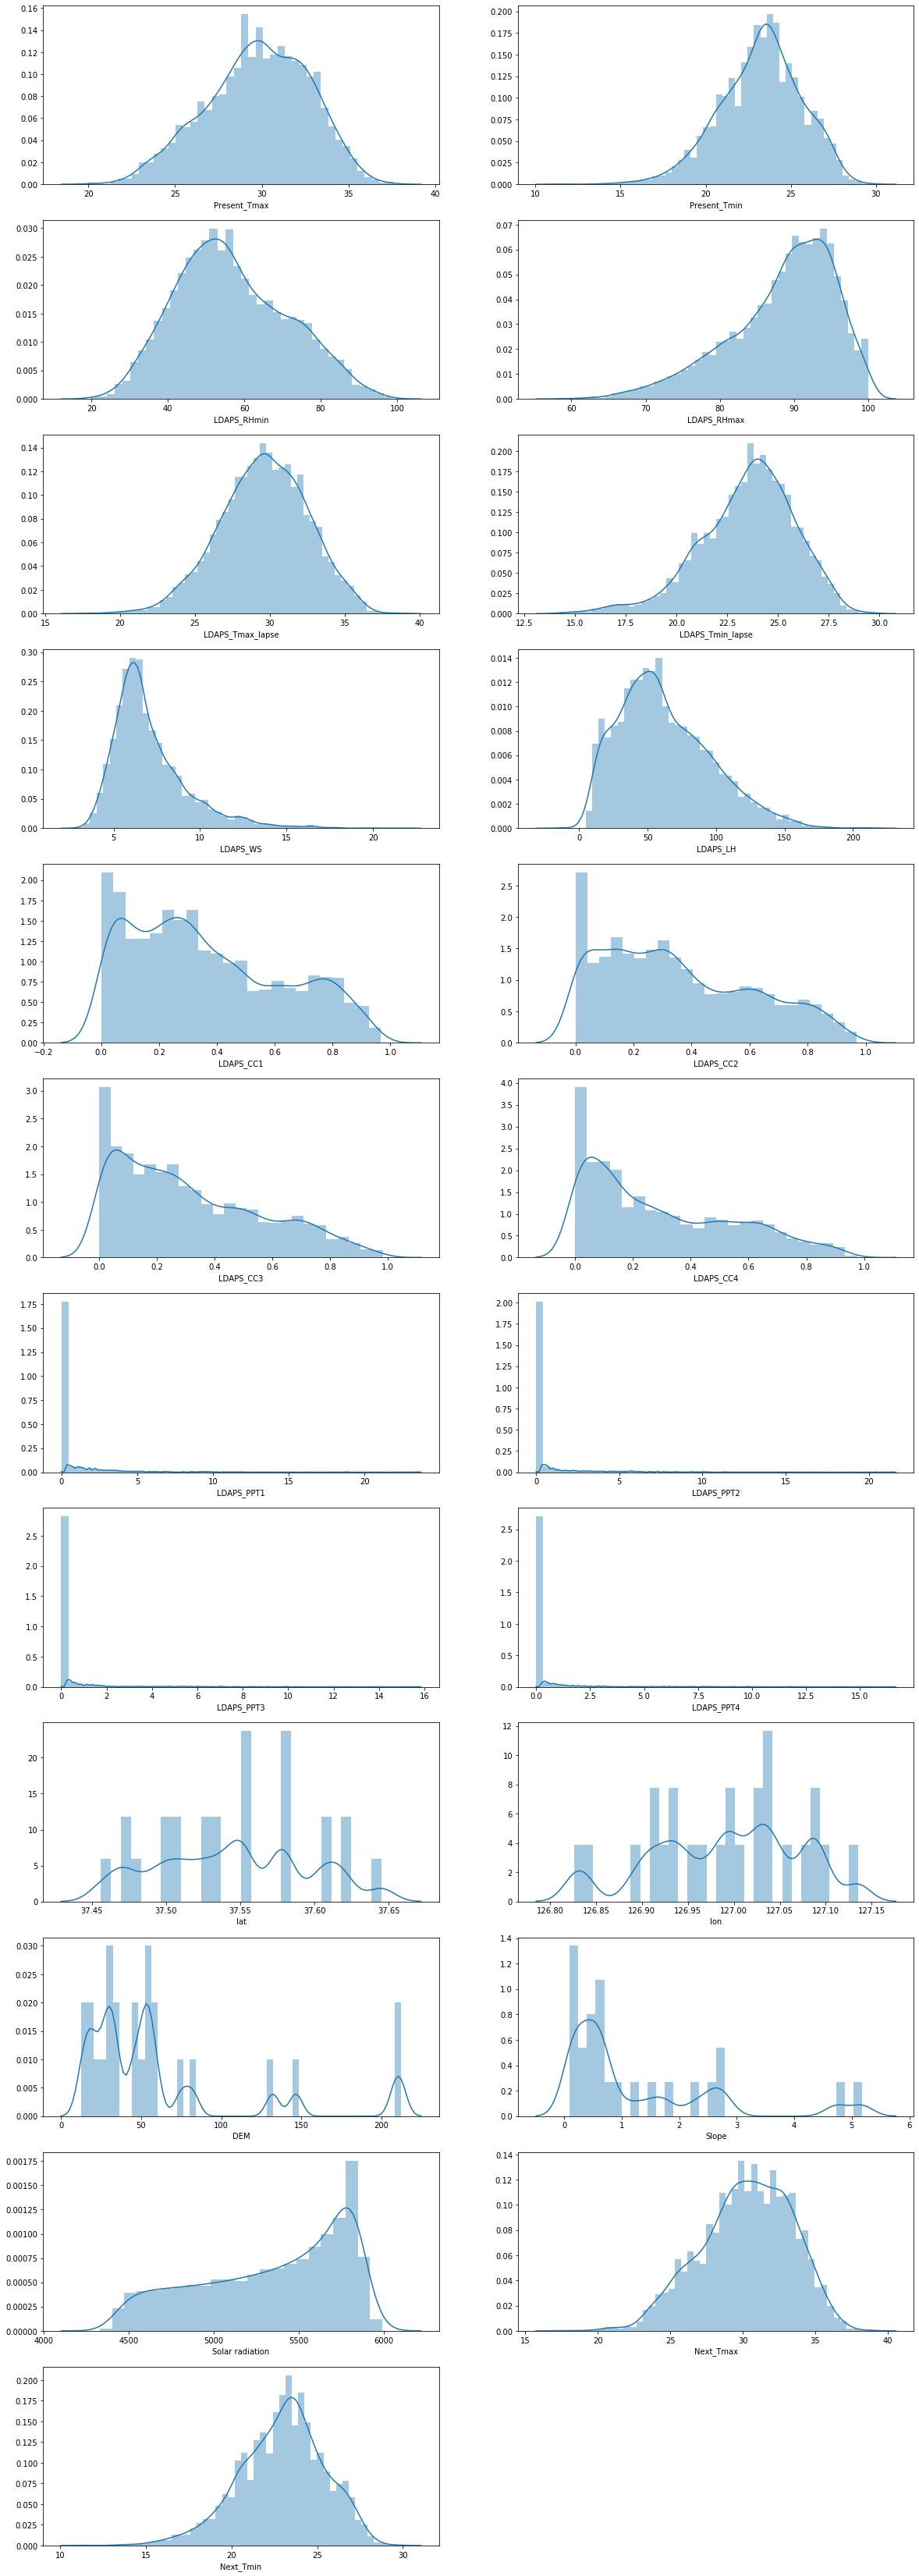

In [11]:
plt.figure(figsize=(20,70))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

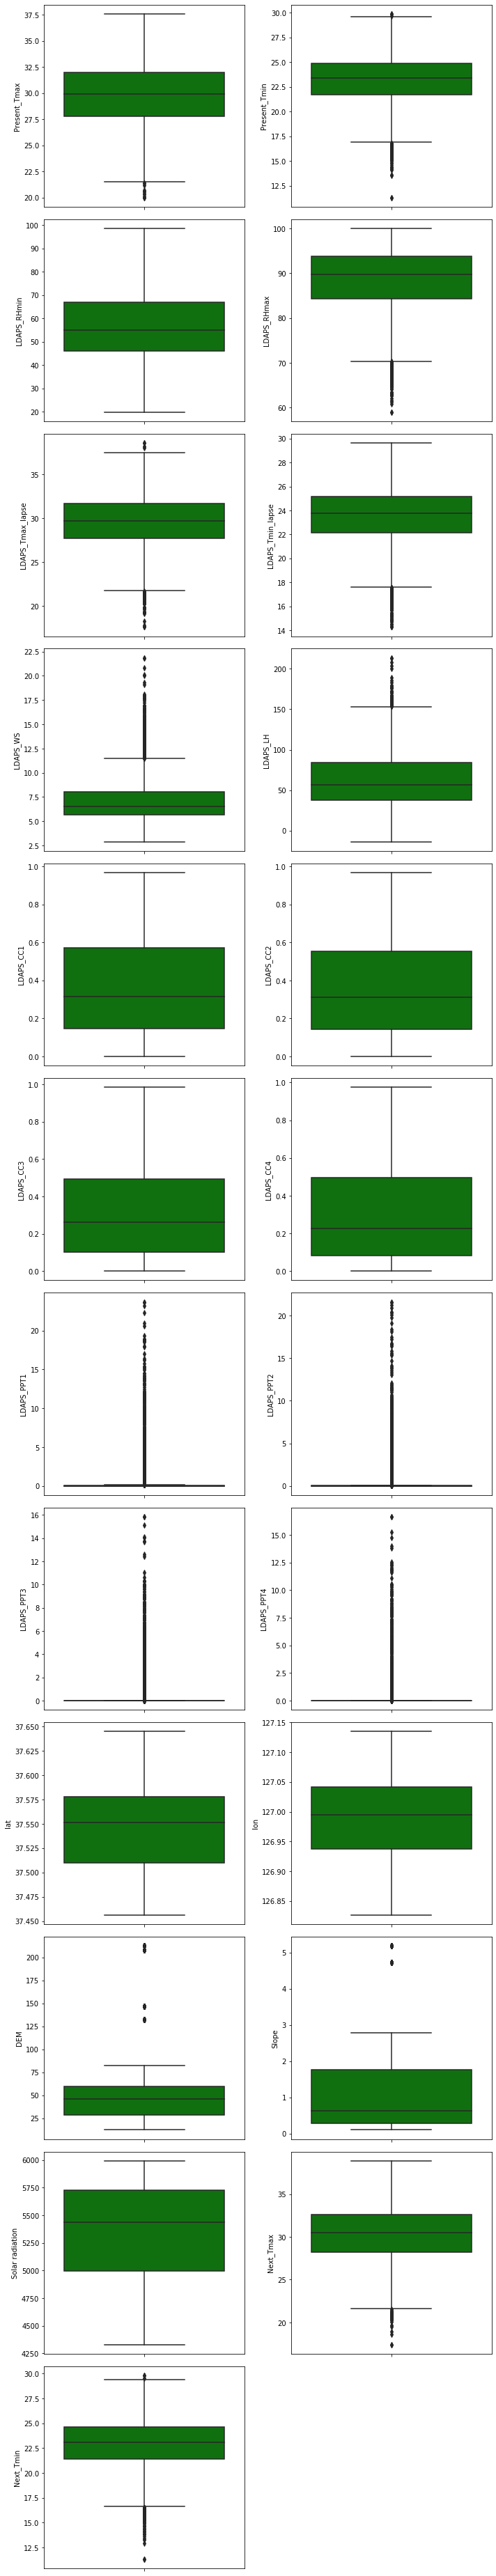

In [12]:
#Lets visualize outliers through boxplots
plt.figure(figsize=(10,60))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [13]:
#Lets describe the data statistically
df.describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,29.769401,23.226638,56.742728,88.388526,29.614319,23.514978,7.092539,62.450450,0.368260,0.355658,...,0.480309,0.275507,0.266799,37.544881,126.991397,61.867908,1.256916,5341.502809,30.275671,22.932804
std,2.956583,2.403093,14.597941,7.158475,2.932913,2.334099,2.173908,33.571543,0.261238,0.256845,...,1.754897,1.156496,1.200650,0.050395,0.079435,54.279768,1.370539,429.158865,3.122585,2.483296
min,20.000000,11.300000,19.795000,58.936000,17.625000,14.273000,2.883000,-13.603000,0.000000,0.000000,...,0.000000,0.000000,0.000000,37.456000,126.826000,12.370000,0.098000,4329.521000,17.400000,11.300000
25%,27.800000,21.700000,46.046500,84.317000,27.692750,22.114750,5.686000,37.532500,0.148000,0.142000,...,0.000000,0.000000,0.000000,37.510000,126.937000,28.700000,0.271000,4999.019000,28.200000,21.400000
50%,29.900000,23.400000,55.039000,89.793000,29.703000,23.760000,6.547000,56.865000,0.316000,0.312000,...,0.000000,0.000000,0.000000,37.551000,126.995000,45.716000,0.618000,5436.345000,30.500000,23.100000
75%,32.000000,24.900000,67.038000,93.704250,31.684000,25.134250,8.007250,83.904250,0.572000,0.555000,...,0.017000,0.007000,0.000000,37.578000,127.042000,59.832000,1.768000,5728.316000,32.600000,24.600000
max,37.600000,29.900000,98.525000,100.000000,38.542000,29.619000,21.858000,213.414000,0.967000,0.968000,...,21.622000,15.841000,16.655000,37.645000,127.135000,212.335000,5.178000,5992.896000,38.900000,29.800000


In [14]:
#Lets check the correlation.
dfcor= df.corr()
dfcor

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Present_Tmax,1.000000,0.618769,-0.205341,-0.300261,0.570285,0.624227,-0.123566,0.134216,-0.313177,-0.214912,...,-0.101361,-0.122052,-0.101119,-0.053012,0.008990,-0.187138,-0.105890,-0.025401,0.610256,0.622700
Present_Tmin,0.618769,1.000000,0.121800,-0.012660,0.464419,0.764237,-0.037684,-0.011331,0.082019,0.088287,...,0.064851,-0.049018,-0.065549,-0.078744,-0.043509,-0.250299,-0.146467,0.053638,0.471723,0.796657
LDAPS_RHmin,-0.205341,0.121800,1.000000,0.578770,-0.564574,0.089345,0.294538,-0.070653,0.613888,0.745498,...,0.391109,0.240830,0.168795,0.086772,-0.076233,0.102108,0.123734,0.244643,-0.439171,0.094062
LDAPS_RHmax,-0.300261,-0.012660,0.578770,1.000000,-0.373273,-0.113915,0.134785,0.238183,0.436116,0.390881,...,0.228397,0.134086,0.117374,0.195116,0.025662,0.177134,0.219555,0.148259,-0.281282,-0.070193
LDAPS_Tmax_lapse,0.570285,0.464419,-0.564574,-0.373273,1.000000,0.654014,-0.311974,0.047955,-0.438405,-0.523594,...,-0.242113,-0.188133,-0.160300,-0.041851,0.090663,-0.178896,-0.162330,0.047821,0.827471,0.587065
LDAPS_Tmin_lapse,0.624227,0.764237,0.089345,-0.113915,0.654014,1.000000,-0.130246,-0.134909,0.010693,0.047548,...,0.000588,-0.088789,-0.094855,-0.095940,-0.026701,-0.195444,-0.185840,0.159445,0.588223,0.881074
LDAPS_WS,-0.123566,-0.037684,0.294538,0.134785,-0.311974,-0.130246,1.000000,0.007115,0.289789,0.261386,...,0.192430,0.162173,0.144549,0.036691,-0.059447,0.190993,0.171588,0.122968,-0.345582,-0.098732
LDAPS_LH,0.134216,-0.011331,-0.070653,0.238183,0.047955,-0.134909,0.007115,1.000000,-0.146928,-0.263922,...,-0.077061,0.016483,0.020330,0.131873,0.025818,0.055127,0.086743,-0.046553,0.155684,-0.056832
LDAPS_CC1,-0.313177,0.082019,0.613888,0.436116,-0.438405,0.010693,0.289789,-0.146928,1.000000,0.779753,...,0.389769,0.169124,0.092087,-0.008047,-0.006831,-0.014067,-0.020742,0.219261,-0.454755,-0.012723
LDAPS_CC2,-0.214912,0.088287,0.745498,0.390881,-0.523594,0.047548,0.261386,-0.263922,0.779753,1.000000,...,0.478665,0.240406,0.159851,-0.001446,-0.003580,-0.012819,-0.018073,0.171236,-0.492639,0.029819


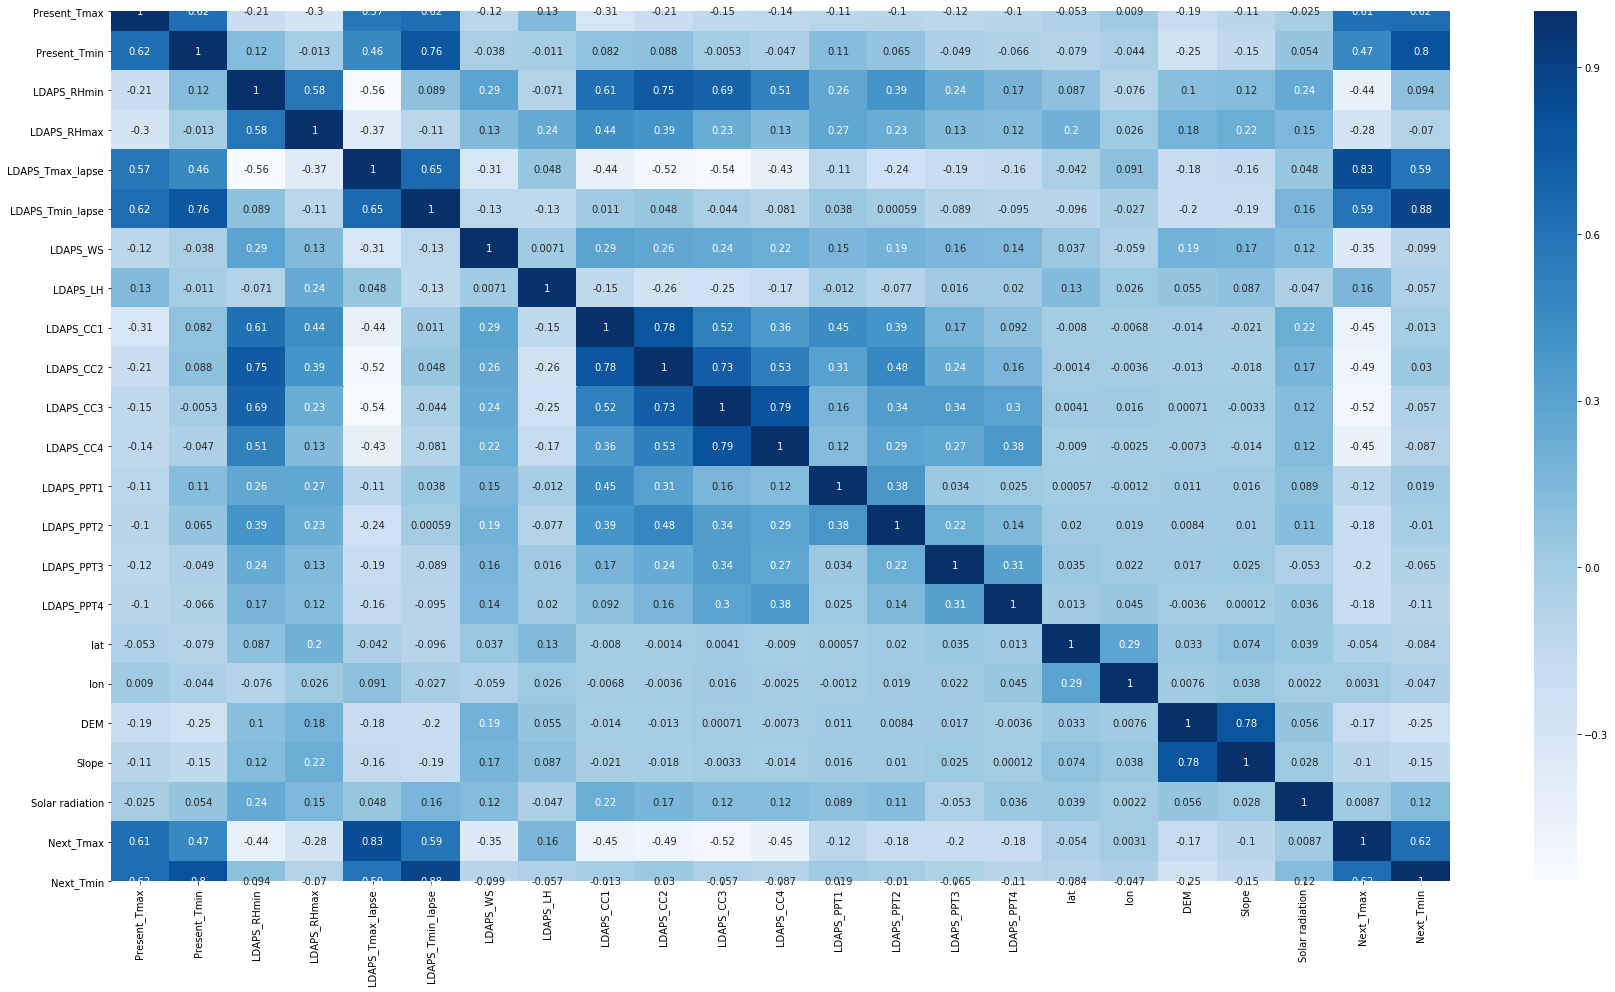

In [15]:
plt.figure(figsize = (30,16))
sns.heatmap(dfcor,cmap = 'Blues',annot = True)

In [16]:
#Now lets check the skewness
df.skew()

Present_Tmax       -0.265337
Present_Tmin       -0.369481
LDAPS_RHmin         0.303564
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.228761
LDAPS_Tmin_lapse   -0.584735
LDAPS_WS            1.584982
LDAPS_LH            0.678316
LDAPS_CC1           0.464980
LDAPS_CC2           0.477032
LDAPS_CC3           0.646625
LDAPS_CC4           0.673653
LDAPS_PPT1          5.395196
LDAPS_PPT2          5.776861
LDAPS_PPT3          6.458577
LDAPS_PPT4          6.826897
lat                 0.082726
lon                -0.285213
DEM                 1.723262
Slope               1.562912
Solar radiation    -0.511210
Next_Tmax          -0.340943
Next_Tmin          -0.405143
dtype: float64

In [17]:
#Treating using log
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [18]:
df.skew()

Present_Tmax       -0.265337
Present_Tmin       -0.369481
LDAPS_RHmin         0.303564
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.228761
LDAPS_Tmin_lapse   -0.584735
LDAPS_WS            0.692026
LDAPS_LH           -0.625764
LDAPS_CC1           0.464980
LDAPS_CC2           0.477032
LDAPS_CC3           0.391632
LDAPS_CC4           0.448959
LDAPS_PPT1          2.766149
LDAPS_PPT2          3.195820
LDAPS_PPT3          4.014305
LDAPS_PPT4          4.230605
lat                 0.082726
lon                -0.285213
DEM                 0.443744
Slope               0.835972
Solar radiation    -0.511210
Next_Tmax          -0.340943
Next_Tmin          -0.405143
dtype: float64

In [36]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.36172509, 0.76016871, 0.1036701 , ..., 1.51793488, 0.37652986,
        0.69782911],
       [0.72067506, 0.67693727, 0.30689372, ..., 1.22994835, 0.07184549,
        0.17429753],
       [0.61920005, 0.03053001, 0.55167005, ..., 1.2165352 , 0.26400635,
        0.38950571],
       ...,
       [2.22210036, 2.42479758, 2.31621074, ..., 2.07432562, 0.7928784 ,
        2.22815219],
       [3.30450051, 4.96335662, 2.53118642, ..., 2.35821084, 4.12366669,
        4.68472344],
       [2.64870034, 2.77716765, 2.8623877 , ..., 1.51793488, 2.76209758,
        2.76553364]])

In [37]:
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64), array([ 6, 13, 13, ..., 13, 14, 15], dtype=int64))


In [21]:
z[25][6]

3.0955849956634856

In [38]:
df.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [32]:
df['LDAPS_LH'].fillna((df['LDAPS_LH'].median()),inplace=True)

In [40]:
df_new=df[((z<3).all(axis=1))] #Removing the outliers
df_new.head(5)

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.256,91.116,28.074,23.007,2.056557,4.254932,0.234,0.204,0.150143,0.123102,0.0,0.0,0.0,0.0,37.605,126.991,5.362864,1.331046,5992.896,29.1,21.2
1,31.9,21.6,52.263,90.605,29.851,24.035,1.900913,3.969103,0.226,0.252,0.147558,0.120446,0.0,0.0,0.0,0.0,37.605,127.032,3.823454,0.414755,5869.312,30.5,22.5
2,31.6,23.3,48.690,83.974,30.091,24.566,1.965433,3.071443,0.209,0.257,0.185649,0.132781,0.0,0.0,0.0,0.0,37.578,127.058,3.535349,0.235862,5863.556,31.1,23.9
3,32.0,23.4,58.240,96.484,29.705,23.326,1.894617,4.200610,0.216,0.226,0.149282,0.125751,0.0,0.0,0.0,0.0,37.645,127.022,3.844087,1.262713,5856.965,31.7,24.3
4,31.4,21.9,56.174,90.155,29.114,23.486,1.907318,4.691036,0.151,0.250,0.164667,0.157004,0.0,0.0,0.0,0.0,37.551,127.135,3.584574,0.408793,5859.552,31.2,22.5


# Next_Tmax

In [41]:
x=df_new.iloc[:,0:-2]

In [42]:
x.shape

(6709, 21)

In [43]:
y=df_new[['Next_Tmax']]

In [44]:
y.shape

(6709, 1)

In [45]:
#Scaling the input variable
#Algorithm requires all features to be on common scale

In [46]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x = scale.fit_transform(x)

In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

max_r_score = 0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size = 0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state
print('max r2 score corresponding to',final_r_state,'is',max_r_score)

max r2 score corresponding to 95 is 0.7723469569387907


In [48]:

from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring ='r2').mean()

0.6157238592661206

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 95,test_size=0.20)
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
pred = lreg.predict(x_test)

In [50]:
lreg.score(x_train,y_train)

0.7466647865689788

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [52]:
model = [LinearRegression(),RandomForestRegressor(n_estimators = 200, random_state = 45),GradientBoostingRegressor(),AdaBoostRegressor()]

In [55]:
for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    print('score',score)

score 0.7466647865689788
score 0.9839568628164252
score 0.8574497975242492
score 0.7522416958792488


In [56]:
cros_val= [LinearRegression(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor()]
for cv in cros_val:
    score= cross_val_score(cv,x,y,cv=5,scoring='r2')
    print(score.mean())

0.6742116573275894
0.6377895346797989
0.6753831829712136
0.6317523013633959


In [57]:
rf=RandomForestRegressor(n_estimators = 200, random_state = 45)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9839568628164252

In [58]:
from sklearn.externals import joblib
joblib.dump(rf,'rfnext_Tmx.obj')
rf_from_joblib = joblib.load('rfnext_Tmx.obj')
rf_from_joblib.predict(x_test)

array([28.9315, 29.4425, 28.5285, ..., 33.2605, 31.5335, 33.2575])

# Next_Tmin

In [60]:
y_m=df_new[['Next_Tmin']]

In [61]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

max_r_score = 0
for r_state in range(42,100):
    x_train,x_test,y_m_train,y_m_test = train_test_split(x,y_m,random_state=r_state,test_size = 0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_m_train)
    y_m_pred = regr.predict(x_test)
    r2_scr = r2_score(y_m_test,y_m_pred)
    if r2_scr>max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state
print('max r2 score corresponding to',final_r_state,'is',max_r_score)

max r2 score corresponding to 81 is 0.8352495081392155


In [62]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring ='r2').mean()

0.6157238592661206

In [63]:
x_train,x_test,y_m_train,y_m_test = train_test_split(x,y_m,random_state = 81,test_size=0.20)
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_m_train)
pred = lreg.predict(x_test)
lreg.score(x_train,y_m_train)

0.8134545998051971

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [65]:
model = [LinearRegression(),RandomForestRegressor(n_estimators = 200, random_state = 45),GradientBoostingRegressor(),AdaBoostRegressor()]

In [67]:
for m in model:
    m.fit(x_train,y_m_train)
    score=m.score(x_train,y_m_train)
    print('score',score)

score 0.8134545998051971
score 0.9857170779101008
score 0.8958316344067301
score 0.7954650986456426


In [69]:
cros_val= [LinearRegression(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor()]
for cv in cros_val:
    score= cross_val_score(cv,x,y_m,cv=5,scoring='r2')
    print(score.mean())

0.7647422591096212
0.7551424726612981
0.7844491520817753
0.7265414882958426


In [70]:
rf=RandomForestRegressor(n_estimators = 200, random_state = 45)
rf.fit(x_train,y_m_train)
rf.score(x_train,y_m_train)

0.9857170779101008

In [71]:
from sklearn.externals import joblib
joblib.dump(rf,'rfnext_Tmn.obj')
rf_from_joblib = joblib.load('rfnext_Tmn.obj')
rf_from_joblib.predict(x_test)

array([24.107 , 21.35  , 24.7405, ..., 23.0155, 22.098 , 25.5755])